# Buildings

The buildings tool helps managing GIS data which describes buildings.
As of today, the tool supports data in geopandas dataframe format, mainly polygons that define bulding areas.

When initializing the tool, one should deliver the project name.
Other available parameters are: 

<ul>
<li>FilesDirectory: The path in which to save new files. Note that the path must be a full path.
    If this parameter is not specified, new files are saved at the current working directory.</li>
<li>databaseNameList: See projectMultiDB documentation.</li>
<li>useAll: See projectMultiDB documentation.</li>
<li>publicProjectName: The project name at the public database, the default name is "Buildings".</li>
<li>Source: The source of the data, which is defined at the config document. The defaul
    source is "BNTL", which corresponds to the data which is loaded when initializing hera-data.</li>
</ul>

In [1]:
from hera.measurements.GIS.locations.buildings import datalayer as buildingsDatalayer
buildings = buildingsDatalayer(projectName="Documentation", FilesDirectory="/home/ofir/Development/pyhera/hera/doc/source/measurements/GIS/locations/examples", 
                           databaseNameList=None, useAll=False,publicProjectName="Buildings",Source="BNTL")

The default config document of the tool is:

In [2]:
buildings.getConfig()

{'source': 'BNTL'}

Adding parameters to the config document, or changing the source, can be done using setConfig.

## Datalayer

One may load an existing geopandas dataframe or create a new rectangle dataframe based on the exterior coordinates.
Both actions are done using the same function. 
In order to create a new file and a corresponding document in the database, two parameters must be given to the function. The first is called points, and it holds the ITM coordinates of a rectangle. It is a list, from the structure [minimum x, minimum y, maximum x, maximum y]. The second is called CutName, and it is used as part of the new file’s name.

Any other parameters can be given as descriptors of the data. In the next example a parameter named Region is defined.

In the next examples, we will load the data directly from the disk, and the lines that demonstrate how to load it from the
database are written as notes.

In [11]:
points = [193000, 731000, 218500, 764000]
#example_data = buildings.getDocuments(points=points,CutName="HaifaBuildings",Region="Haifa")

The function retruns a list of documents. Throughout the rest of the tutorial, we would use the data achieved by getData().

In [4]:
import geopandas
#example_data = example_data[0].getData()
example_data = geopandas.read_file("examples/HaifaBuildings.shp")
example_data[:1]

,UNIQ_ID,PARENT,FCODE,FTYPE,HI_PNT_X,HI_PNT_Y,HI_PNT_Z,HEIGHT,HT_LAND,FNAME,...,BLDG_HT,ADDR_ID,ADDR_COUNT,USG_ID,CMPLX_ID,CMLX_FCD,ORIG_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,51662297,4316949,201,11,207266.243427,759906.441194,18.03,16.91,2.92,None,...,13.99,0,0,53987944,54450684,251,3616.34135,392.894721,3616.34135,"POLYGON ((207291.800 759848.500, 207254.410 75..."


The data is loaded as a geopandas dataframe.

Now that the new project contains data, the data can be loaded by addressing its descriptors. Using the getDocuments function without any parameters will return all the documents in the project. In the next example, we will load all the data that holds the region Haifa.

In [4]:
#example_data = buildings.getDocuments(Region="Haifa")[0].getData()

The data can also be querried by geometrical properties. The default type of querries check if a certain shape lies entirely within existing datas. For example, we would define a line that lies entirely within the rectangle of the contour data but some of it is outside the bounds of the other data types. The query would return only the contour data.

The query is done by addressing a parameter called ‘Shape’.

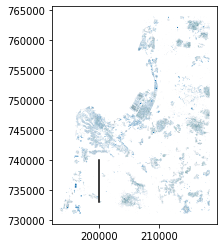

In [5]:
from shapely import geometry
import matplotlib.pyplot as plt
line = geometry.LineString([(200000, 740000), (200000, 733000)])
#example_data = buildings.getDocuments(Shape=line)[0][0].getData()
example_data.plot()
plt.plot([200000,200000],[733000,740000], color="black")
plt.show()

Another kind of geometrical queries return all the data that intersects with the defined shape. It is defined by a parameter called ‘ShapeMode’. The line intersects with all the data types we had saved in the database. Therefore, all the data should be returned.

In [6]:
example_intersect = buildings.getDocuments(Shape=line, ShapeMode="intersects")

In addition, a saved shapely geometry name can be given as the shapely (see Shape tool documentation). For example, in the next example all the data that contains Haifa’s port is loaded.

In [6]:
#contain_port = buildings.getDocuments(Shape="Haifa_Port")

## Analysis

### Convex Polygons

geopandas has a function called convex_hull, which return a polygon that includes all the polygons of a dataframe. However, sometimes the dataframe holds several remote areas of adjust polygons, and we would like to get the convex polygon of each area. For those case, we can use the following function.

We will use it, as an example, on a dataframe of buildings of Katsrin.

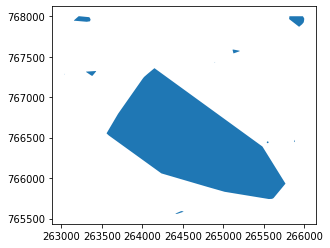

In [9]:
#katsrinBuildings = buildings.getDocuments(points=[263000,765000,266000,768000],CutName="Katsrin")[0].getData()
katsrinBuildings = geopandas.read_file("examples/Katsrin.shp")
convexed = buildings.analysis.ConvexPolygons(katsrinBuildings)
convexed.plot()

We may choose different buffers to decide which distances between areas leads to seperations of polygons. The defaut buffer is 100 m.

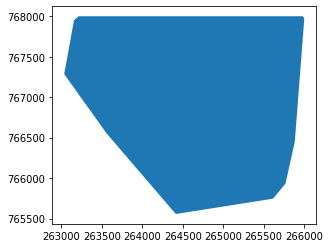

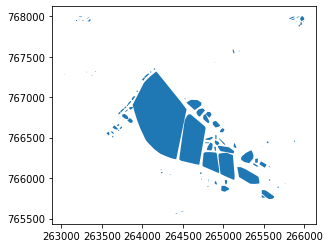

In [10]:
largeBuffer = buildings.analysis.ConvexPolygons(katsrinBuildings, buffer=1000)
smallBuffer = buildings.analysis.ConvexPolygons(katsrinBuildings, buffer=10)
largeBuffer.plot()
smallBuffer.plot()